# Topic: COVID-19 Data Analysis and Visualization 

# Step 1: Understand the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_csv("C:\\Users\\adity\\Downloads\\COVID-19 DataSet\\worldometer_data.csv")

In [4]:
data

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [5]:
# Display first few rows
print(data.head())

  Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1   

# Step 2: Data Cleaning

In [6]:
# Filling missing values with 0 for simplicity
data.fillna(0, inplace=True)

# Ensure numeric columns are properly formatted
data['TotalCases'] = data['TotalCases'].astype(int)
data['TotalDeaths'] = data['TotalDeaths'].astype(int)
data['TotalRecovered'] = data['TotalRecovered'].astype(int)
data['ActiveCases'] = data['ActiveCases'].astype(int)

Convert date columns to datetime format:

# Step 2: Analyze Key Metrics

In [7]:
# Add calculated columns
data['Recovery Rate (%)'] = (data['TotalRecovered'] / data['TotalCases']) * 100
data['Fatality Rate (%)'] = (data['TotalDeaths'] / data['TotalCases']) * 100

# Display top 5 rows with new metrics
print(data[['Country/Region', 'TotalCases', 'Recovery Rate (%)', 'Fatality Rate (%)']].head())

  Country/Region  TotalCases  Recovery Rate (%)  Fatality Rate (%)
0            USA     5032179          51.203822           3.235259
1         Brazil     2917562          70.183941           3.381042
2          India     2025409          68.005228           2.055782
3         Russia      871894          77.573306           1.675204
4   South Africa      538184          71.967208           1.784520


# Step 3: Visualize Data

1. Top 10 Countries with Most Cases

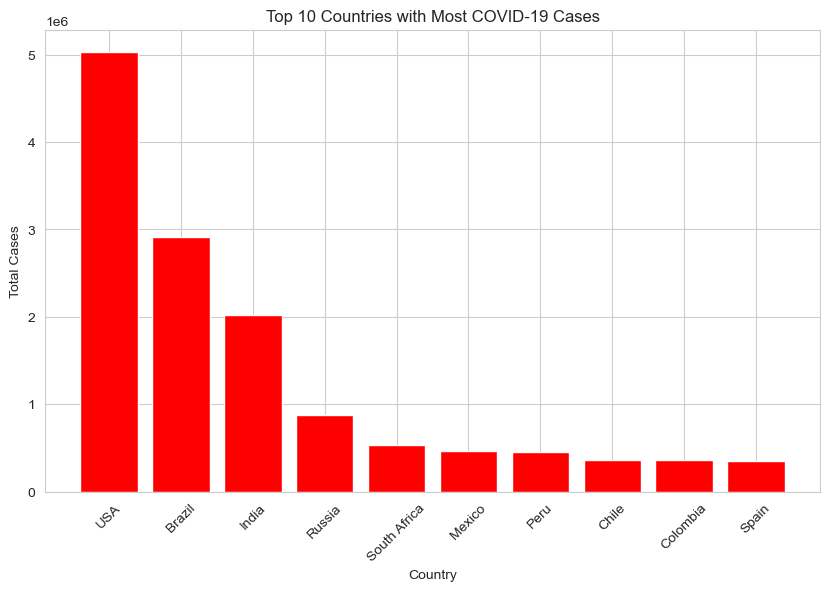

In [13]:
# Sort data by TotalCases and take top 10
top_countries = data.sort_values(by='TotalCases', ascending=False).head(10)

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_countries['Country/Region'], top_countries['TotalCases'], color='red')
plt.title('Top 10 Countries with Most COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()

2. Recovery Rate vs Fatality Rate

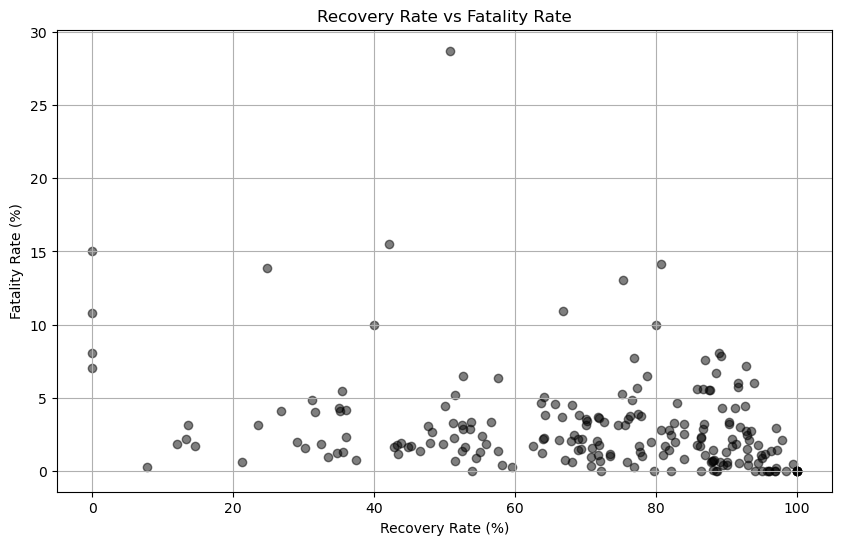

In [9]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Recovery Rate (%)'], data['Fatality Rate (%)'], alpha=0.5, color='black')
plt.title('Recovery Rate vs Fatality Rate')
plt.xlabel('Recovery Rate (%)')
plt.ylabel('Fatality Rate (%)')
plt.grid()
plt.show()

3. Total Cases by Continent

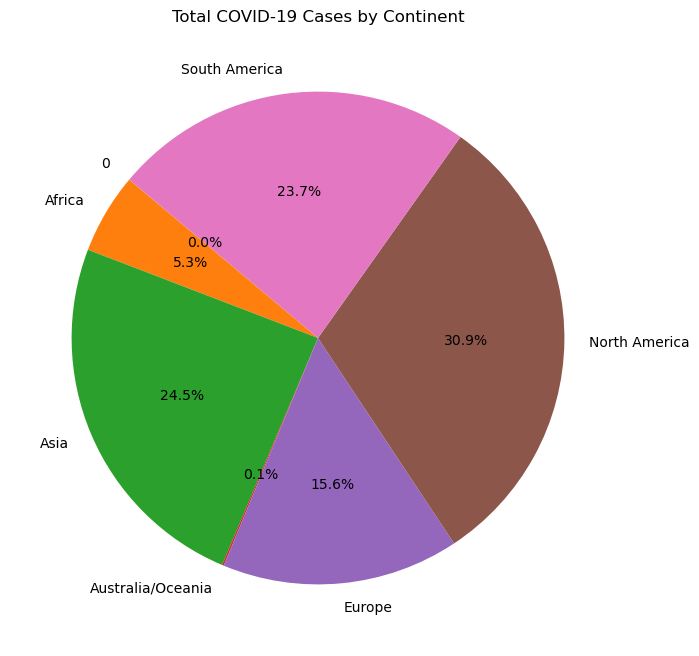

In [10]:
# Group by continent
continent_data = data.groupby('Continent')['TotalCases'].sum().reset_index()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(continent_data['TotalCases'], labels=continent_data['Continent'], autopct='%1.1f%%', startangle=140)
plt.title('Total COVID-19 Cases by Continent')
plt.show()